In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = pd.DataFrame({'city':['tokyo', None, 'london', 'seattle', 'san francisco',
'tokyo'],
'boolean':['yes', 'no', None, 'no', 'no', 'yes'],
'ordinal_column':['somewhat like', 'like', 'somewhat like', 'like',
'somewhat like', 'dislike'],
'quantitative_column':[1, 11, -.5, 10, None, 20]})

print(X)

            city boolean ordinal_column  quantitative_column
0          tokyo     yes  somewhat like                  1.0
1           None      no           like                 11.0
2         london    None  somewhat like                 -0.5
3        seattle      no           like                 10.0
4  san francisco      no  somewhat like                  NaN
5          tokyo     yes        dislike                 20.0


boolean（布尔值）：此列是二元分类数据（是/否），定类等级。
city（城市）：此列是分类数据，也是定类等级。
ordinal_column（顺序列）：顾名思义，此列是顺序数据，定序等级。
quantitative_column（定量列）：此列是整数，定比等级。

In [9]:
X['city'].value_counts().index[0]

'tokyo'

In [3]:
frequentIdx = X['city'].value_counts().index[0]

In [4]:
X['city'].map(lambda value: value if value != None else frequentIdx)

0            tokyo
1            tokyo
2           london
3          seattle
4    san francisco
5            tokyo
Name: city, dtype: object

In [5]:
X['city'].fillna(frequentIdx, inplace=True)

In [6]:
X

,city,boolean,ordinal_column,quantitative_column
0,tokyo,yes,somewhat like,1.0
1,tokyo,no,like,11.0
2,london,None,somewhat like,-0.5
3,seattle,no,like,10.0
4,san francisco,no,somewhat like,NaN
5,tokyo,yes,dislike,20.0


In [7]:
from sklearn.base import TransformerMixin

class CustomCategoryImputer(TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        
    def transform(self, df):
        X = df.copy()
        for col in self.cols:
            X[col].fillna(X[col].value_counts().index[0], inplace=True)
        return X
    
    def fit(self, *_):
        return self

In [8]:
cci = CustomCategoryImputer(cols=['city', 'boolean'])
XX = cci.fit_transform(X)
XX

,city,boolean,ordinal_column,quantitative_column
0,tokyo,yes,somewhat like,1.0
1,tokyo,no,like,11.0
2,london,no,somewhat like,-0.5
3,seattle,no,like,10.0
4,san francisco,no,somewhat like,NaN
5,tokyo,yes,dislike,20.0


In [9]:
from sklearn.base import TransformerMixin
from sklearn.preprocessing import Imputer
class CustomQuantitativeImputer(TransformerMixin):
    def __init__(self, cols=None, strategy='mean'):
        self.cols = cols
        self.strategy = strategy
        
    def transform(self, df):
        X =df.copy()
        impute = Imputer(strategy = self.strategy)
        for col in self.cols:
            X[col] = impute.fit_transform(X[[col]])
        return X
    
    def fit(self, *_):
        return self

In [10]:
cqi = CustomQuantitativeImputer(cols=['quantitative_column'],
strategy='mean')
XXX = cqi.fit_transform(XX)

c:\users\1\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [11]:
XXX

,city,boolean,ordinal_column,quantitative_column
0,tokyo,yes,somewhat like,1.0
1,tokyo,no,like,11.0
2,london,no,somewhat like,-0.5
3,seattle,no,like,10.0
4,san francisco,no,somewhat like,8.3
5,tokyo,yes,dislike,20.0


In [12]:
#对定性数据编码
XXXX = pd.get_dummies(XXX, columns=['city', 'boolean'], prefix_sep='__')
XXXX

,ordinal_column,quantitative_column,city__london,city__san francisco,city__seattle,city__tokyo,boolean__no,boolean__yes
0,somewhat like,1.0,0,0,0,1,0,1
1,like,11.0,0,0,0,1,1,0
2,somewhat like,-0.5,1,0,0,0,1,0
3,like,10.0,0,0,1,0,1,0
4,somewhat like,8.3,0,1,0,0,1,0
5,dislike,20.0,0,0,0,1,0,1


In [13]:
#对定序数据编码
ordering = ['dislike', 'somewhat like', 'like'] # 0是dislike，1是somewhat like，2是like
XXXX['ordinal_column'] = XXXX['ordinal_column'].map(lambda x: ordering.index(x))

In [14]:
XXXX

,ordinal_column,quantitative_column,city__london,city__san francisco,city__seattle,city__tokyo,boolean__no,boolean__yes
0,1,1.0,0,0,0,1,0,1
1,2,11.0,0,0,0,1,1,0
2,1,-0.5,1,0,0,0,1,0
3,2,10.0,0,0,1,0,1,0
4,1,8.3,0,1,0,0,1,0
5,0,20.0,0,0,0,1,0,1


In [15]:
XXXX['quantitative_column'] = pd.cut(XXXX['quantitative_column'], bins=3, labels=False)
XXXX

,ordinal_column,quantitative_column,city__london,city__san francisco,city__seattle,city__tokyo,boolean__no,boolean__yes
0,1,0,0,0,0,1,0,1
1,2,1,0,0,0,1,1,0
2,1,0,1,0,0,0,1,0
3,2,1,0,0,1,0,1,0
4,1,1,0,1,0,0,1,0
5,0,2,0,0,0,1,0,1


# 根据胸部加速度计识别动作的数据集

In [16]:
df = pd.read_csv('activity_recognizer/1.csv', header=None)
df.columns = ['index', 'x', 'y', 'z', 'activity']
df.head()

,index,x,y,z,activity
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162501 entries, 0 to 162500
Data columns (total 5 columns):
index       162501 non-null float64
x           162501 non-null int64
y           162501 non-null int64
z           162501 non-null int64
activity    162501 non-null int64
dtypes: float64(1), int64(4)
memory usage: 6.2 MB


In [18]:
df['activity'].value_counts(normalize=True)

7    0.515369
1    0.207242
4    0.165291
3    0.068793
5    0.019637
6    0.017951
2    0.005711
0    0.000006
Name: activity, dtype: float64

In [19]:
df.isnull().sum()

index       0
x           0
y           0
z           0
activity    0
dtype: int64

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X = df[['x', 'y', 'z']]
# 删除响应变量，建立特征矩阵
y = df['activity']

# 需要试验的KNN 模型超参数
knn_params = {'n_neighbors':[3, 4, 5, 6]}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, knn_params)
grid.fit(X, y)
print(grid.best_score_, grid.best_params_)

c:\users\1\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\1\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.720752487676999 {'n_neighbors': 5}


In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

X_poly = poly.fit_transform(X)
X_df = pd.DataFrame(X_poly, columns = poly.get_feature_names())

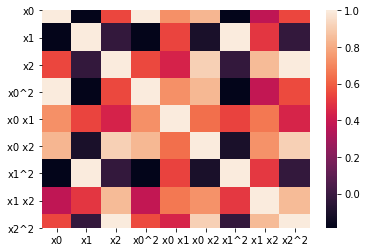

In [22]:
sns.heatmap(X_df.corr())

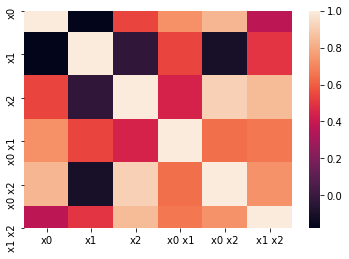

In [23]:
poly2 = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

X_poly2 = poly2.fit_transform(X)
X_df2 = pd.DataFrame(X_poly2, columns = poly2.get_feature_names())

sns.heatmap(X_df2.corr())

In [24]:
pipe_params = {'poly_features__degree':[1, 2, 3], 'poly_features__interaction_only':
[True, False], 'classify__n_neighbors':[3, 4, 5, 6]}

from sklearn.pipeline import Pipeline
pipe = Pipeline([('poly_features', poly), ('classify', knn)])
grid = GridSearchCV(pipe, pipe_params)
grid.fit(X, y)
print(grid.best_score_, grid.best_params_)

c:\users\1\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\1\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.7211894080651812 {'classify__n_neighbors': 5, 'poly_features__degree': 2, 'poly_features__interaction_only': True}


# CountVectorizer

In [26]:
tweets = pd.read_csv('twitter_sentiment.csv', encoding='latin1')
tweets.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [27]:
del tweets['ItemID']

In [28]:
tweets

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
...,...,...
99984,0,@Cupcake seems like a repeating problem hop...
99985,1,@cupcake__ arrrr we both replied to each other...
99986,0,@CuPcAkE_2120 ya i thought so
99987,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
X = tweets['SentimentText']
y = tweets['Sentiment']
vect = CountVectorizer()
_ = vect.fit_transform(X)

  (0, 71938)	1
  (0, 93674)	1
  (0, 90542)	1
  (0, 65062)	1
  (0, 80817)	1
  (0, 21665)	1
  (0, 65503)	1


In [35]:
print(_.shape)

(99989, 105849)
